In [3]:
with open('Москва_2021.txt', 'r') as f:
    ages = [int(line.strip()) for line in f]
len(ages)

32423

In [ ]:


p1 = (min(ages), ages.count(min(ages))) #минимальный возраст
pn = (max(ages), ages.count(max(ages))) #максимальный возраст

xs = ((p1[0]+pn[0]) / 2)
if xs in ages:
    ps = (xs, ages.count(xs))
else:

    xi = round(xs - 0.5)
    xi1 = round(xs + 0.5)
    yi = ages.count(xi)
    yi1 = ages.count(xi1)
    ys = yi + ((yi1 - yi) / (xi1 - xi)) * (xs - xi)
    ps = (xs, ys)

print(p1, ps, pn)


(14, 49) (43.5, 926.0) (73, 17)


### теперь необходимо для каждой из 7 видов зависимостей вычислить среднее 𝒙̅ и экспериментальное 𝒚̅



вычислим все виды 

In [ ]:
structures = []
structures.append((((p1[0] + pn[0]) / 2), ((p1[1] + pn[1]) / 2))) ## тут сравнить со средним интерполированным
structures.append((((p1[0] * pn[0])**0.5), ((p1[1] * pn[1])**0.5))) ## тут сравнить с yi
structures.append((((p1[0] + pn[0]) / 2), ((p1[1] * pn[1])**0.5))) ## тут сравнить со средним интерполированным
structures.append(((2*p1[0]*pn[0]/(p1[0] + pn[0])), ((p1[1] + pn[1]) / 2))) ## тут сравнить с yi1
structures.append((((p1[0] + pn[0]) / 2), (2*p1[1]*pn[1]/(p1[1] + pn[1])))) ## тут сравнить со средним интерполированным
structures.append(((2*p1[0]*pn[0]/(p1[0] + pn[0])), (2*p1[1]*pn[1]/(p1[1] + pn[1])))) ## тут сравнить с yi1
structures.append((((p1[0] * pn[0])**0.5), ((p1[1] + pn[1]) / 2))) ## тут сравнить с yi

structures

distribution = {14: 49, 15: 53, 16: 236, 17: 126, 18: 806, 19: 971, 20: 910, 21: 716, 22: 944, 23: 1071, 24: 810, 25: 1050, 26: 980, 27: 1263, 28: 1113, 29: 1340, 30: 734, 31: 1115, 32: 796, 33: 758, 34: 869, 35: 676, 36: 1198, 37: 522, 38: 1006, 39: 695, 40: 723, 41: 837, 42: 978, 43: 820, 44: 1032, 45: 690, 46: 677, 47: 831, 48: 1026, 49: 1060, 50: 150, 51: 188, 52: 193, 53: 47, 54: 26, 55: 62, 56: 76, 57: 136, 58: 262, 59: 74, 60: 266, 61: 226, 62: 139, 63: 183, 64: 189, 65: 79, 66: 188, 67: 128, 69: 202, 70: 26, 71: 85, 73: 17}
x = list(distribution.keys())
y = list(distribution.values())

xs = [43.5, 32, 23.5,]
ys = [33.0, 28.9, 25.2]
i_s = []
for i in xs:
  if i not in x:
    for j in range(len(x)):
      if i>x[j] and i<x[j+1]:
        i_s.append(j)
        break
  else:
    i_s.append(x.index(i))

ys_s = []
f = 0
for i in i_s:
  ys_s.append(round(y[i] + (y[i+1]-y[i])/(x[i+1]-x[i])*(xs[f]-x[i]),2))
  f+=1

print(ys_s)
structures

[926.0, 796.0, 940.5]


[(43.5, 33.0),
 (31.96873472629156, 28.861739379323623),
 (43.5, 28.861739379323623),
 (23.49425287356322, 33.0),
 (43.5, 25.242424242424242),
 (23.49425287356322, 25.242424242424242),
 (31.96873472629156, 33.0)]

вычислим все отклонения теоретических значений 𝒚̅ от теоретических для 7 видов структур и выберем структуру с наименьшим отклонением для апроксимации

In [ ]:
delta_Ys = []
delta_Ys.append(structures[0][1] - ys_s[0])
delta_Ys.append(structures[1][1] - ys_s[1])
delta_Ys.append(structures[2][1] - ys_s[0])
delta_Ys.append(structures[3][1] - ys_s[2])
delta_Ys.append(structures[4][1] - ys_s[0])
delta_Ys.append(structures[5][1] - ys_s[2])
delta_Ys.append(structures[6][1] - ys_s[1])
delta_Ys = list(map(abs, delta_Ys))
delta_Ys, delta_Ys.index(min(delta_Ys))

delta_Ys_percent = [round(i / 32423, 4) * 100 for i in delta_Ys]
delta_Ys_percent
print(min(delta_Ys_percent))

2.35


In [10]:
distribution = {23: 1071, 32: 796, 27: 1263, 26: 980, 44: 1032, 49: 1060, 63: 183, 34: 869, 66: 188, 38: 1006, 28: 1113, 35: 676, 46: 677, 62: 139, 22: 944, 31: 1115, 37: 522, 18: 806, 29: 1340, 30: 734, 20: 910, 69: 202, 36: 1198, 25: 1050, 48: 1026, 40: 723, 21: 716, 45: 690, 41: 837, 24: 810, 19: 971, 67: 128, 42: 978, 33: 758, 57: 136, 47: 831, 43: 820, 55: 62, 51: 188, 39: 695, 52: 193, 56: 76, 60: 266, 64: 189, 61: 226, 16: 236, 15: 53, 58: 262, 50: 150, 53: 47, 65: 79, 59: 74, 71: 85, 14: 49, 17: 126, 70: 26, 73: 17, 54: 26}

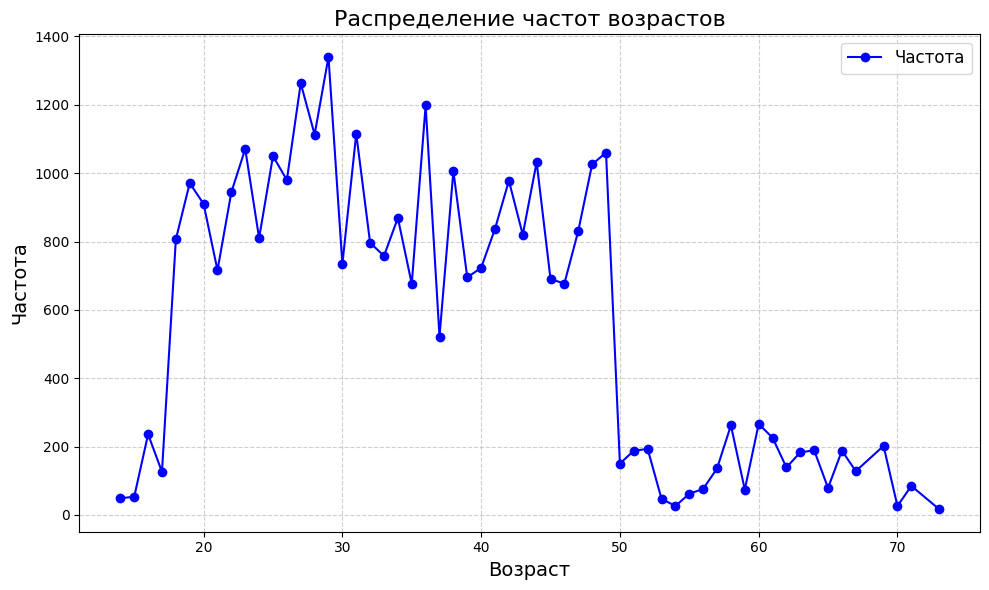

In [ ]:
import matplotlib.pyplot as plt


# Извлекаем ключи (возраст) и значения (частота) из словаря
ages = sorted(list(distribution.keys()))
frequencies = [distribution[key] for key in ages]

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(ages, frequencies, marker='o', linestyle='-', color='b', label='Частота')

# Настраиваем оси и заголовок
plt.title('Распределение частот возрастов', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Отображаем график
plt.show()


In [ ]:
print(sum(frequencies), "- сумма частот")

# восстановить пропуски
for i in range(len(ages) - 1):
    if ages[i] + 1 == ages[i+1]:
        frequencies.insert(i+1, (frequencies[i] + frequencies[i+1]) / 2)

delta1 = []
for i in range(1, len(frequencies)):
    y_curr = frequencies[i]
    y_prev = frequencies[i-1]
    delta1.append(abs(y_curr - y_prev))
print(max(delta1) <= sum(frequencies)*0.02)
delta2 = []
for i in range(1, len(delta1)):
    y_curr = delta1[i]
    y_prev = delta1[i-1]
    delta2.append(abs(y_curr - y_prev))
delta2
print(max(delta2) <= sum(frequencies)*0.02)
delta3 = []
for i in range(1, len(delta2)):
    y_curr = delta2[i]
    y_prev = delta2[i-1]
    delta3.append(abs(y_curr - y_prev))
delta3
print(max(delta3) <= sum(frequencies)*0.02)
delta4 = []
for i in range(1, len(delta3)):
    y_curr = delta3[i]
    y_prev = delta3[i-1]
    delta4.append(abs(y_curr - y_prev))
delta4
print(max(delta4) <= sum(frequencies)*0.02)
delta5 = []
for i in range(1, len(delta4)):
    y_curr = delta4[i]
    y_prev = delta4[i-1]
    delta5.append(abs(y_curr - y_prev))
delta5
print(max(delta5) <= sum(frequencies)*0.02, "подходит многочлен 5 степени")

#Значит, показатель степени аппроксимирующего многочлена, соответствующий максимальному значению ряда разностей, не превышающему 2% от суммы частот - {nk}

32423 - сумма частот
False
False
False
False
True подходит многочлен 5 степени
